In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt; 
%matplotlib inline
from shapely.geometry import Point, Polygon, box

In [2]:
from shapely.geometry import box
import geopandas as gpd

xmin=0; ymin=0; xmax=1; ymax=1
rect = box(xmin, ymin, xmax, ymax)
area1 = gpd.GeoDataFrame({'area_name':['area1'],
                          'visibility': [0.90],
                          'geometry': rect}, 
                         geometry='geometry'
                        )
area1

,area_name,visibility,geometry
0,area1,0.9,"POLYGON ((1 0, 1 1, 0 1, 0 0, 1 0))"


In [3]:
from numpy.random import random
from shapely.geometry import Point
import geopandas as gpd

n = 3
xrange=(0, 1); yrange=(0, 1)

xs = (random(n) * (xrange[1] - xrange[0])) + xrange[0]
ys = (random(n) * (yrange[1] - yrange[0])) + yrange[0]
gds = gpd.GeoSeries([Point(xy) for xy in zip(xs, ys)])

ceramics = gpd.GeoDataFrame({'layer_name': ['ceramics'] * n,
                           'fid': [f'ceramics_{i}' for i in range(n)],
                           'time_penalty': [0.1] * n,
                           'ideal_obs_rate': [0.95] * n,
                           'geometry': gds},
                          geometry = 'geometry'
                         )
ceramics

,layer_name,fid,time_penalty,ideal_obs_rate,geometry
0,ceramics,ceramics_0,0.1,0.95,POINT (0.2632293239240059 0.8804683873891883)
1,ceramics,ceramics_1,0.1,0.95,POINT (0.5718831884170252 0.3997966666387478)
2,ceramics,ceramics_2,0.1,0.95,POINT (0.07077968717039973 0.4232877177242337)


In [4]:
n = 2
xrange=(0, 1); yrange=(0, 1)

xs = (random(n) * (xrange[1] - xrange[0])) + xrange[0]
ys = (random(n) * (yrange[1] - yrange[0])) + yrange[0]
gds = gpd.GeoSeries([Point(xy) for xy in zip(xs, ys)])

lithics = gpd.GeoDataFrame({'layer_name': ['lithics'] * n,
                           'fid': [f'lithics_{i}' for i in range(n)],
                           'time_penalty': [0.15] * n,
                           'ideal_obs_rate': [0.80] * n,
                           'geometry': gds},
                          geometry = 'geometry'
                         )
lithics

,layer_name,fid,time_penalty,ideal_obs_rate,geometry
0,lithics,lithics_0,0.15,0.8,POINT (0.2388537290566652 0.5915310138048444)
1,lithics,lithics_1,0.15,0.8,POINT (0.3053942964950834 0.9313355287478928)


In [5]:
assemblage = pd.concat([ceramics, lithics], ignore_index=True)
assemblage

,layer_name,fid,time_penalty,ideal_obs_rate,geometry
0,ceramics,ceramics_0,0.10,0.95,POINT (0.2632293239240059 0.8804683873891883)
1,ceramics,ceramics_1,0.10,0.95,POINT (0.5718831884170252 0.3997966666387478)
2,ceramics,ceramics_2,0.10,0.95,POINT (0.07077968717039973 0.4232877177242337)
3,lithics,lithics_0,0.15,0.80,POINT (0.2388537290566652 0.5915310138048444)
4,lithics,lithics_1,0.15,0.80,POINT (0.3053942964950834 0.9313355287478928)


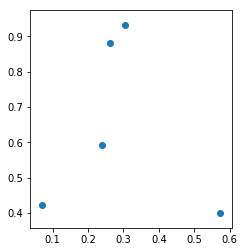

In [6]:
assemblage.plot()

In [7]:
import pandas as pd

team = pd.DataFrame({'surveyor_type': ['pi', 'grad', 'undergrad', 'undergrad', 'undergrad'],
                     'skill': [1.0, 0.95, 0.85, 0.85, 0.85],
                     'speed_penalty': [0.0, 0.0, 0.2, 0.2, 0.2]
                    })

for stype in team['surveyor_type'].unique():
    stype_df = team.loc[team['surveyor_type']==stype, :]
    team.loc[stype_df.index, 'sid'] = [i for i in range(stype_df.shape[0])]

team['sid'] = team.apply(lambda x: x['surveyor_type'] + '_' + str(int(x['sid'])), axis=1)
team = team.loc[:, ['sid', 'surveyor_type', 'skill', 'speed_penalty']]
team

,sid,surveyor_type,skill,speed_penalty
0,pi_0,pi,1.00,0.0
1,grad_0,grad,0.95,0.0
2,undergrad_0,undergrad,0.85,0.2
3,undergrad_1,undergrad,0.85,0.2
4,undergrad_2,undergrad,0.85,0.2


In [8]:
team

,sid,surveyor_type,skill,speed_penalty
0,pi_0,pi,1.00,0.0
1,grad_0,grad,0.95,0.0
2,undergrad_0,undergrad,0.85,0.2
3,undergrad_1,undergrad,0.85,0.2
4,undergrad_2,undergrad,0.85,0.2
